<center><h1>Food Demand Forecasting<h1><center>

Your client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:  

Historical data of demand for a product-center combination (Weeks: 1 to 145)
Product(Meal) features such as category, sub-category, current price and discount
Information for fulfillment center like center area, city information etc.

### Data Dictionary
 

- Weekly Demand data (train.csv): Contains the historical demand data for all centers, test.csv contains all the following features except the target variable


<img src='img/Screenshot_1.png'/>

- fulfilment_center_info.csv: Contains information for each fulfilment center

<img src='img/Screenshot_2.png' width='300'/>

- meal_info.csv: Contains information for each meal being served

<img src='img/Screenshot_3.png'/>

### Import important Library

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# import pandas_profiling as pp
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import mean_squared_error
# from catboost import CatBoostRegressor
# from catboost import Pool

from pandasql import sqldf
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=15,6
plt.rcParams['agg.path.chunksize'] = 10000
from statsmodels.graphics.api import qqplot

In [2]:
sql=lambda x: sqldf(x,globals())

In [19]:
sqldf("select * from df",globals())

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
5,1270037,1,55,1248,251.23,252.23,0,0,28
6,1191377,1,55,1778,183.36,184.36,0,0,190
7,1499955,1,55,1062,182.36,183.36,0,0,391
8,1025244,1,55,2707,193.06,192.06,0,0,472
9,1054194,1,55,1207,325.92,384.18,0,1,676


In [3]:
df=pd.read_csv("train.csv")
train=pd.read_csv("train.csv")
# test = pd.read_csv('test.csv')
fulfilment_center=pd.read_csv('fulfilment_center_info.csv')
meal_info=pd.read_csv('meal_info.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
id                       32573 non-null int64
week                     32573 non-null int64
center_id                32573 non-null int64
meal_id                  32573 non-null int64
checkout_price           32573 non-null float64
base_price               32573 non-null float64
emailer_for_promotion    32573 non-null int64
homepage_featured        32573 non-null int64
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [7]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [8]:
train.shape

(456548, 9)

In [9]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [10]:
fulfilment_center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


### Merge Using Python

In [13]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0
1,1127204,146,55,1993,160.11,159.11,0,0,647,56,TYPE_C,2.0
2,1212707,146,55,2539,157.14,159.14,0,0,647,56,TYPE_C,2.0
3,1082698,146,55,2631,162.02,162.02,0,0,647,56,TYPE_C,2.0
4,1400926,146,55,1248,163.93,163.93,0,0,647,56,TYPE_C,2.0


In [14]:
train = pd.merge(train,fulfilment_center, on='center_id')
# test = pd.merge(test,fulfilment_center, on='center_id')

train = pd.merge(train,meal_info, on='meal_id')
# test = pd.merge(test,meal_info, on='meal_id')

In [15]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [11]:
sql(''' select * from train
        where week=1

''')

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1040403,1,24,1885,136.83,136.83,0,0,1498,614,85,TYPE_B,3.6,Beverages,Thai
2,1103215,1,11,1885,136.83,136.83,0,0,959,679,56,TYPE_A,3.7,Beverages,Thai
3,1034383,1,83,1885,121.31,120.31,0,1,1025,659,77,TYPE_A,5.3,Beverages,Thai
4,1118999,1,32,1885,114.52,113.52,0,1,445,526,34,TYPE_A,3.8,Beverages,Thai
5,1171094,1,13,1885,135.86,122.28,0,1,2132,590,56,TYPE_B,6.7,Beverages,Thai
6,1472084,1,109,1885,134.86,134.86,0,0,890,599,56,TYPE_A,3.6,Beverages,Thai
7,1212128,1,52,1885,134.89,132.89,0,0,877,685,56,TYPE_B,5.6,Beverages,Thai
8,1297434,1,93,1885,116.46,116.46,0,0,580,461,34,TYPE_A,3.9,Beverages,Thai
9,1280872,1,186,1885,114.49,114.52,0,1,458,649,34,TYPE_A,3.4,Beverages,Thai


In [12]:
train_grp=train.groupby(['week']).sum()

In [15]:
train_grp.describe()

,id,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,1.450000e+02,145.000000,1.450000e+02,1.450000e+02,1.450000e+02,145.000000,145.000000,1.450000e+02,1.450000e+02,145.000000,145.000000
mean,3.936062e+09,258518.875862,6.373843e+06,1.046090e+06,1.115100e+06,255.517241,343.827586,8.245344e+05,1.894055e+06,178257.013793,12857.619310
std,1.889014e+08,11756.799476,3.475186e+05,6.456945e+04,6.745161e+04,150.269855,94.708349,1.256703e+05,9.084978e+04,8858.786772,615.528926
min,3.481137e+09,231194.000000,5.503168e+06,9.011416e+05,9.641055e+05,0.000000,163.000000,3.800650e+05,1.676903e+06,156835.000000,11412.700000
25%,3.813782e+09,249958.000000,6.174113e+06,9.949741e+05,1.061920e+06,152.000000,274.000000,7.451930e+05,1.830624e+06,171863.000000,12417.100000
50%,4.008773e+09,262726.000000,6.515865e+06,1.058398e+06,1.137516e+06,231.000000,335.000000,8.096250e+05,1.928495e+06,181543.000000,13101.600000
75%,4.086730e+09,267502.000000,6.639791e+06,1.101326e+06,1.170282e+06,357.000000,407.000000,8.926310e+05,1.963951e+06,185136.000000,13350.900000
max,4.206285e+09,274997.000000,6.832095e+06,1.140145e+06,1.232478e+06,796.000000,571.000000,1.303457e+06,2.022062e+06,190361.000000,13700.600000


In [13]:
train_grp.head()

,id,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
week,,,,,,,,,,,
1,3645659662,238295,5777913,965809.26,1018365.32,357,414,792261,1758466,165591,11921.4
2,3614794872,235795,5734977,938092.43,1005779.20,621,514,787084,1743166,164178,11830.2
3,3615848647,237202,5723235,948560.28,1008352.05,104,316,695262,1745022,164383,11824.1
4,3613885389,236098,5722512,953833.69,1006446.90,0,292,743529,1738944,163637,11809.5
5,3571456643,237587,5661934,901141.58,1001075.16,337,466,1198675,1721065,160957,11658.5


### Join using SQL

In [17]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [18]:
sql("select * from df ")

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
5,1270037,1,55,1248,251.23,252.23,0,0,28
6,1191377,1,55,1778,183.36,184.36,0,0,190
7,1499955,1,55,1062,182.36,183.36,0,0,391
8,1025244,1,55,2707,193.06,192.06,0,0,472
9,1054194,1,55,1207,325.92,384.18,0,1,676


In [16]:
df_ful=sql('''select m1.id,m1.week,m1.center_id,m1.meal_id,m1.checkout_price,
       m1.base_price,m1.emailer_for_promotion,m1.homepage_featured,m1.num_orders,
       f1.city_code,f1.region_code,f1.center_type,f1.op_area
       from df m1 join fulfilment_center f1
       where m1.center_id=f1.center_id
       ''')

In [37]:
final_df=sql('''select m1.id,m1.week,m1.center_id,m1.meal_id,m1.checkout_price,
       m1.base_price,m1.emailer_for_promotion,m1.homepage_featured,m1.num_orders,
       m1.city_code,m1.region_code,m1.center_type,m1.op_area,m2.category,m2.cuisine
       from df_ful m1  join meal_info m2
       where m1.meal_id=m2.meal_id
       order by m1.week asc

''')

# 

In [38]:
final_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian


In [39]:
df_forcast=sql('''select week,sum(num_orders) as num_orders
       from final_df
       group by week

''')

### Exploratory Data analysis

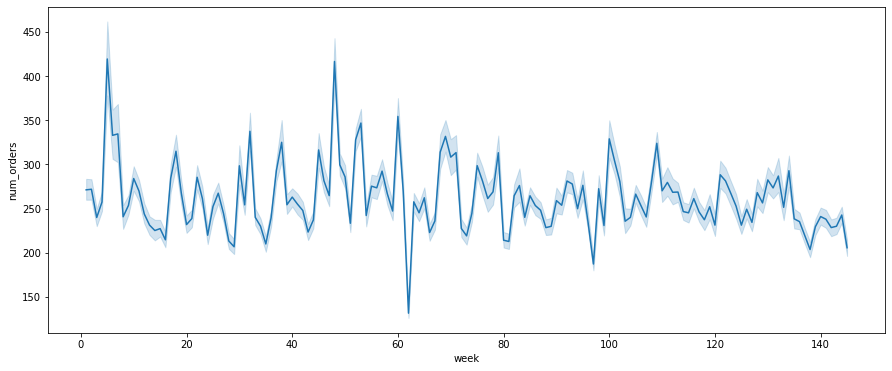

In [191]:
sns.lineplot(train['week'],train['num_orders'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 <a list of 77 Text xticklabel objects>)

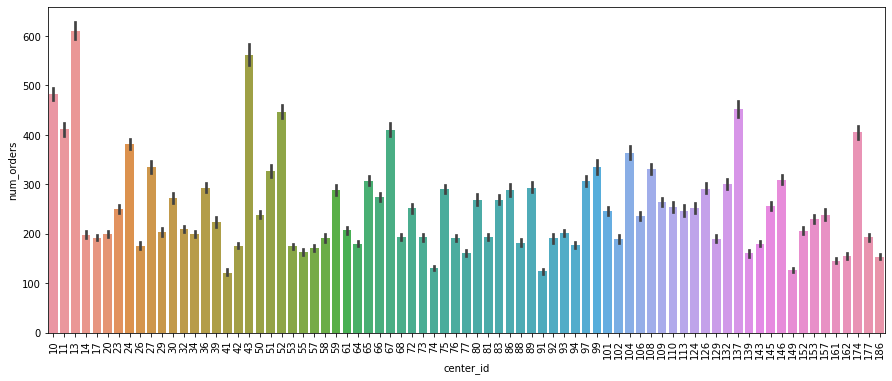

In [192]:
sns.barplot(train['center_id'],train['num_orders'])
plt.xticks(rotation=90)

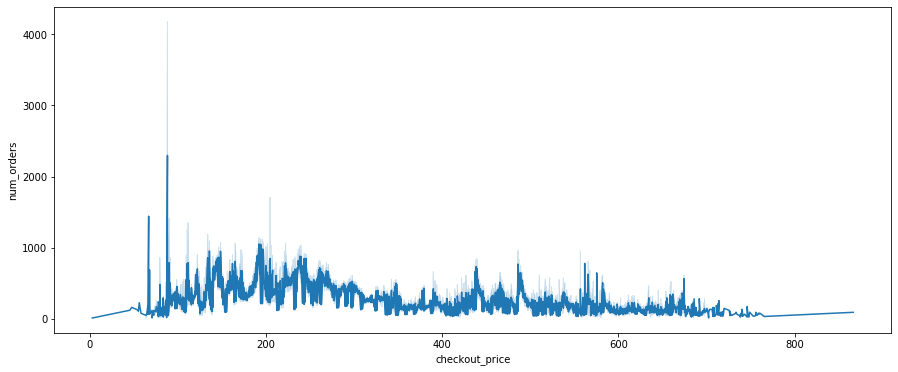

In [193]:
sns.lineplot(train['checkout_price'],train['num_orders'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

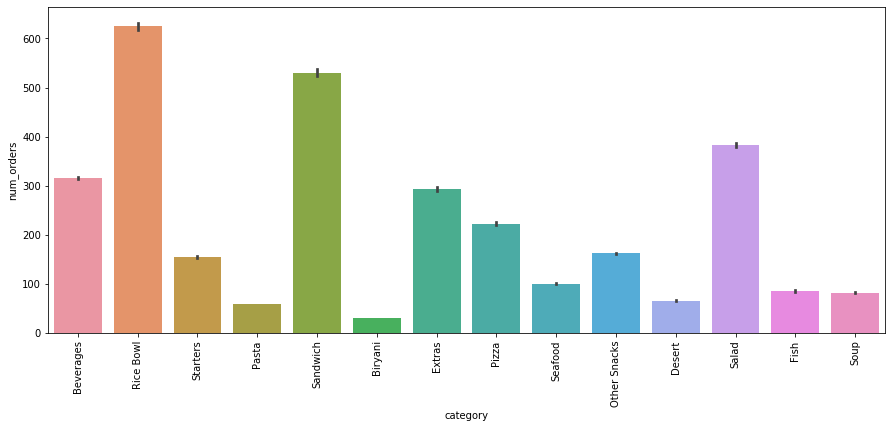

In [194]:
sns.barplot(train['category'],train['num_orders'])
plt.xticks(rotation = '90')

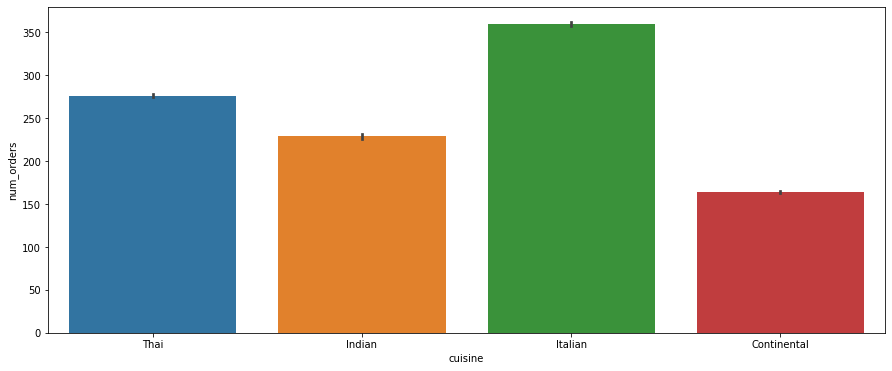

In [195]:
sns.barplot(train['cuisine'],train['num_orders'])
#plt.xticks(rotation = '90')

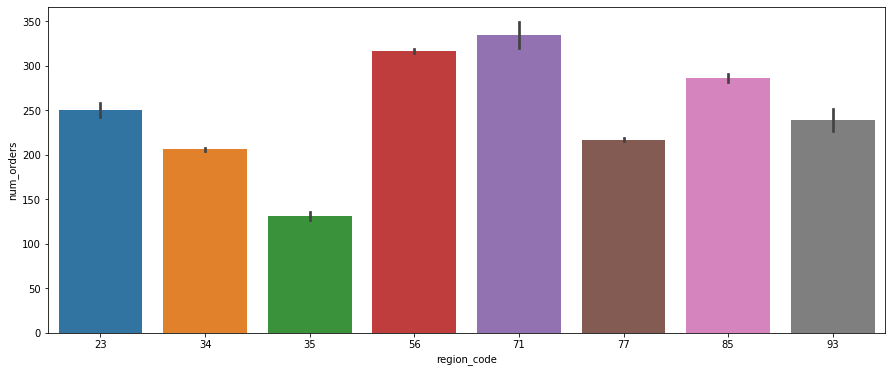

In [196]:
sns.barplot(train['region_code'],train['num_orders'])
#plt.xticks(rotation = '90')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

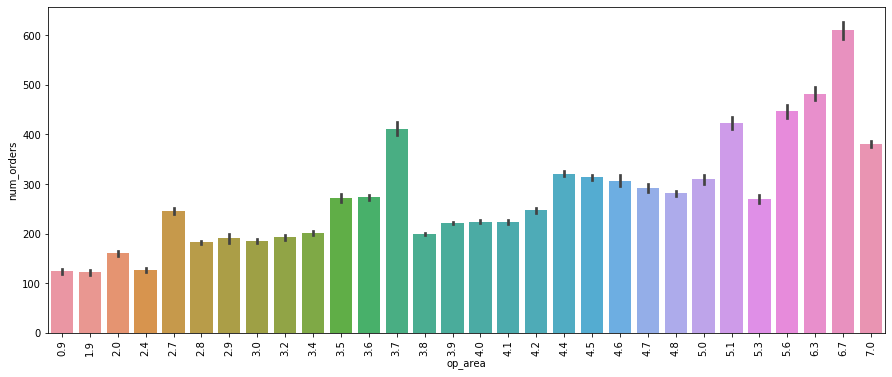

In [197]:
sns.barplot(train['op_area'],train['num_orders'])
plt.xticks(rotation = '90')

(array([400., 450., 500., 550., 600., 650., 700., 750.]),
 <a list of 8 Text xticklabel objects>)

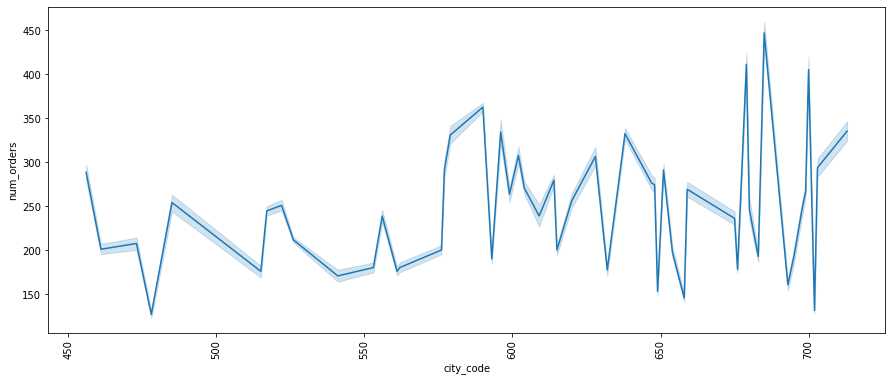

In [198]:
sns.lineplot(train['city_code'],train['num_orders'])
plt.xticks(rotation = '90')

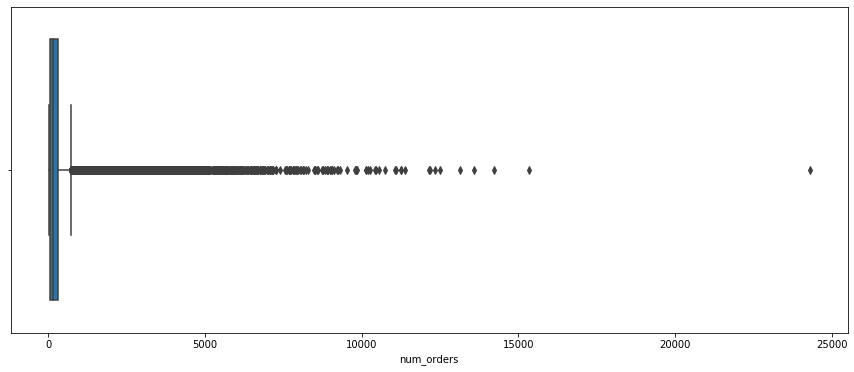

In [199]:
sns.boxplot(x='num_orders',data=train)

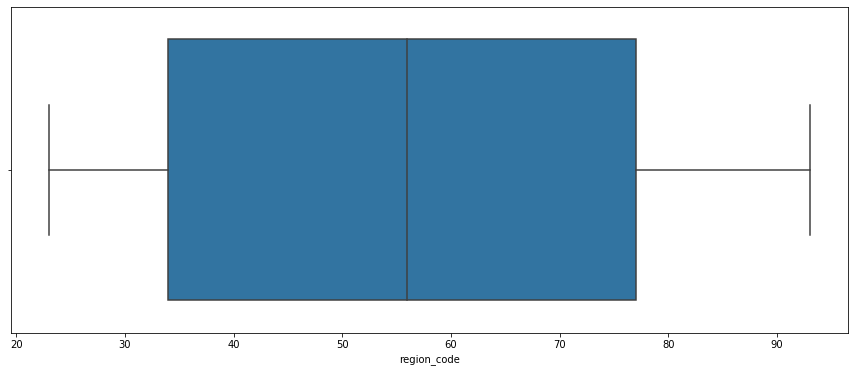

In [200]:
sns.boxplot(x='region_code',data=train)

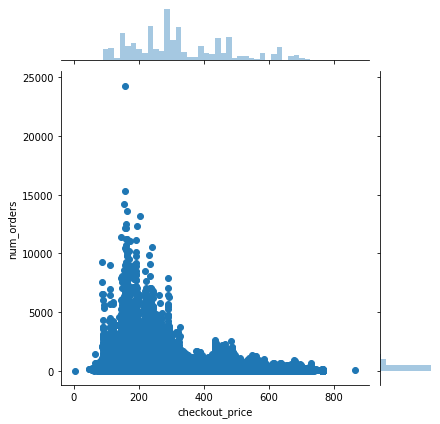

In [202]:
sns.jointplot(x='checkout_price',y='num_orders',data=train)

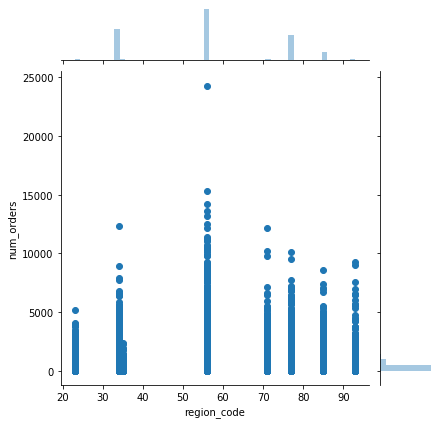

In [203]:
sns.jointplot(x='region_code',y='num_orders',data=train)

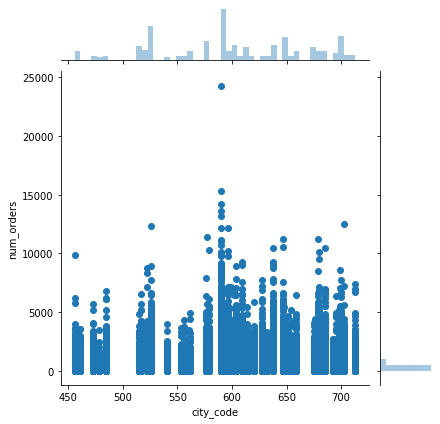

In [204]:
sns.jointplot(x='city_code',y='num_orders',data=train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

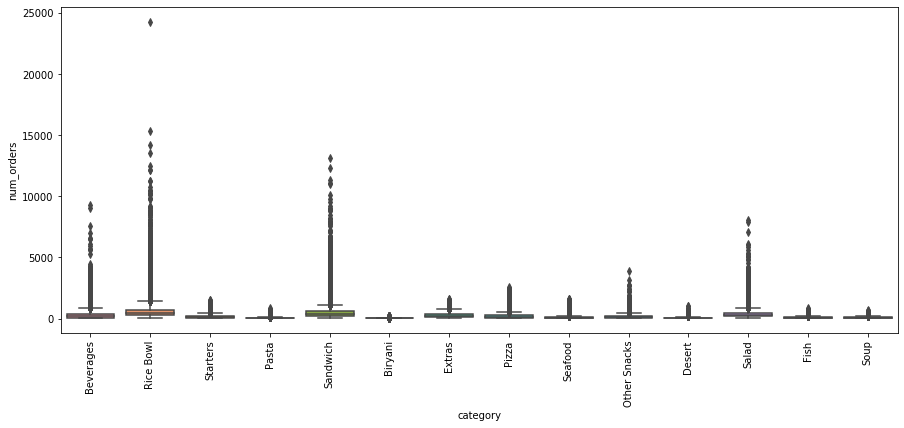

In [205]:
sns.boxplot(x='category',y='num_orders',data=train)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

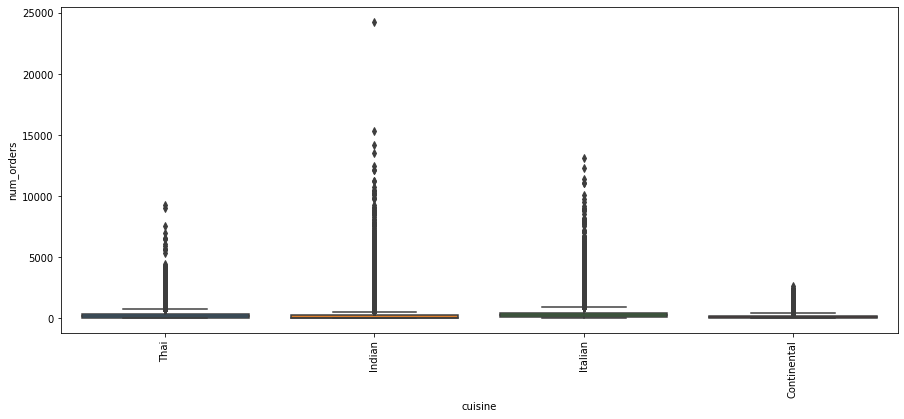

In [206]:
sns.boxplot(x='cuisine',y='num_orders',data=train)
plt.xticks(rotation=90)

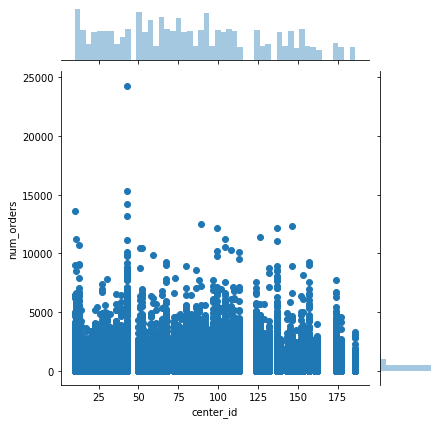

In [207]:
sns.jointplot(x='center_id',y='num_orders',data=train)

In [208]:
print("Total number of centers : ",train['center_id'].nunique())

print("Total Number of cities: ",train['city_code'].nunique())

print("Total Number of cities: ",train['city_code'].nunique())

Total number of centers :  77
Total Number of cities:  51
Total Number of cities:  51


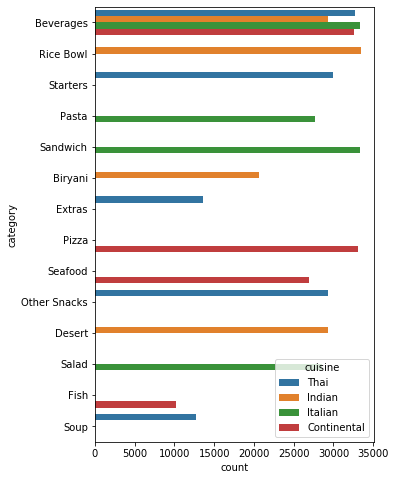

In [209]:
fig, ax = plt.subplots(figsize=(5,8))
sns.countplot(y = train['category'], hue = train['cuisine'], ax=ax)
plt.show()

### Data Preprocessing

In [210]:
center_meal_train = (train['center_id'].astype(str) + "_" + train['meal_id'].astype(str)).unique()
print("There are", len(center_meal_train),"center-meal pairs in train data")

center_meal_test = (test['center_id'].astype(str) + "_" + test['meal_id'].astype(str)).unique()
print("There are", len(center_meal_test),"center-meal pairs in train data")

# check if test set has any new center-mean pair or not
print("There are",len(set(center_meal_test) - set(center_meal_train)),"New center-meal pairs in test dataset which are not present in train dataset")
print(set(center_meal_test) - set(center_meal_train))

There are 3597 center-meal pairs in train data
There are 3548 center-meal pairs in train data
There are 3 New center-meal pairs in test dataset which are not present in train dataset
{'73_2956', '92_2104', '73_1571'}


In [211]:
test[(test['center_id']==73) & (test['meal_id'].isin([2956, 1571]))].shape[0]

11

In [212]:
test[(test['center_id']==92) & (test['meal_id'].isin([2104]))].shape[0]

2

### Deal with Outlier

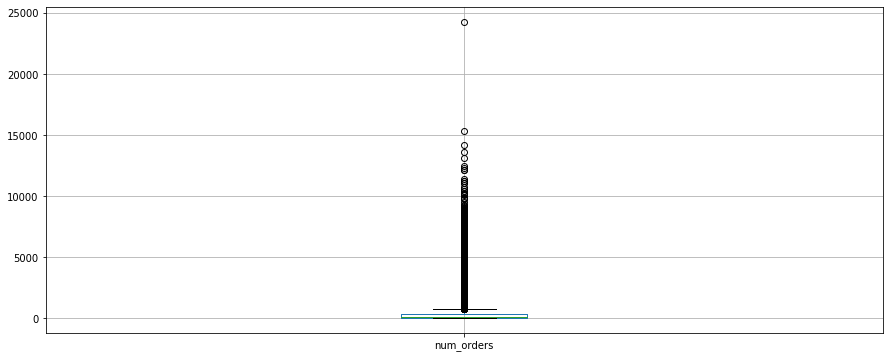

In [214]:
Boxplot=train.boxplot(column=['num_orders'])

In [262]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai
